Loading and pre-processing the dataset:

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Data.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
data.columns=['Ambient Temperature','Exhaust Vaccum','Ambient Pressure','Relative Humidity','Net Hourly Electrical Energy Output']
data.head()

,Ambient Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data.isnull().value_counts()

Ambient Temperature  Exhaust Vaccum  Ambient Pressure  Relative Humidity  Net Hourly Electrical Energy Output
False                False           False             False              False                                  9568
dtype: int64

Scaling the dataset:

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)

In [7]:
df=pd.DataFrame(data=scaled_data,columns=['Ambient Temperature','Exhaust Vaccum','Ambient Pressure','Relative Humidity','Net Hourly Electrical Energy Output'])
df.head()

,Ambient Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,-0.629519,-0.987297,1.820488,-0.009519,0.521208
1,0.741909,0.681045,1.141863,-0.974621,-0.585664
2,-1.951297,-1.173018,-0.185078,1.289840,2.003679
3,0.162205,0.237203,-0.508393,0.228160,-0.462028
4,-1.185069,-1.322539,-0.678470,1.596699,1.144666


Checking if the original and scaled dataset have the same information values:

In [8]:
print('Information Regarding Unscaled Data:')
print('                                                                                                                   ')
data.info()
print('                                                                                                                   ')
print('Information Regarding Scaled Data:')
print('                                                                                                                   ')
df.info()

Information Regarding Unscaled Data:
                                                                                                                   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ambient Temperature                  9568 non-null   float64
 1   Exhaust Vaccum                       9568 non-null   float64
 2   Ambient Pressure                     9568 non-null   float64
 3   Relative Humidity                    9568 non-null   float64
 4   Net Hourly Electrical Energy Output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
                                                                                                                   
Information Regarding Scaled Data:
                                                                                      

Splitting the dataset into training and testing datasets:

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
target=pd.DataFrame(df['Net Hourly Electrical Energy Output'])
features=df.drop('Net Hourly Electrical Energy Output',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ambient Temperature  9568 non-null   float64
 1   Exhaust Vaccum       9568 non-null   float64
 2   Ambient Pressure     9568 non-null   float64
 3   Relative Humidity    9568 non-null   float64
dtypes: float64(4)
memory usage: 299.1 KB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, np.ravel(target),test_size=2871)

Implementing the SVR model:

In [12]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

Kernel = RBF

In [64]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
prediction_rbf = model.predict(X_test)
print(prediction_rbf)
rmse = math.sqrt(mse(prediction_rbf, y_test))
print('Root Mean Squared Error:',rmse)

[ 0.2652001   1.98904374 -1.09761501 ...  0.15018193 -0.92611558
  0.61485243]
Root Mean Squared Error: 0.24247108133137257


Kernel = Linear

In [49]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
rmse = math.sqrt(mse(predictions, y_test))
print('Root Mean Squared Error:',rmse)

[ 0.10309665  1.93434796 -0.87316184 ...  0.11520804 -0.83146109
  0.76266918]
Root Mean Squared Error: 0.2755692979468787


C:\Users\ARYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Data')

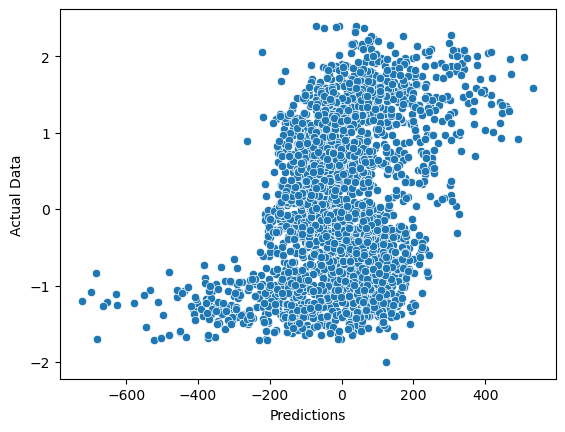

In [67]:
sns.scatterplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Data')

Kernel = Polynomial

In [51]:
model = SVR(kernel='poly')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
rmse = math.sqrt(mse(predictions, y_test))
print('Root Mean Squared Error:',rmse)

[ 0.0828435   2.41442827 -0.5475594  ...  0.02841034 -0.63560775
  0.54405528]
Root Mean Squared Error: 0.48193121823056456


C:\Users\ARYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Data')

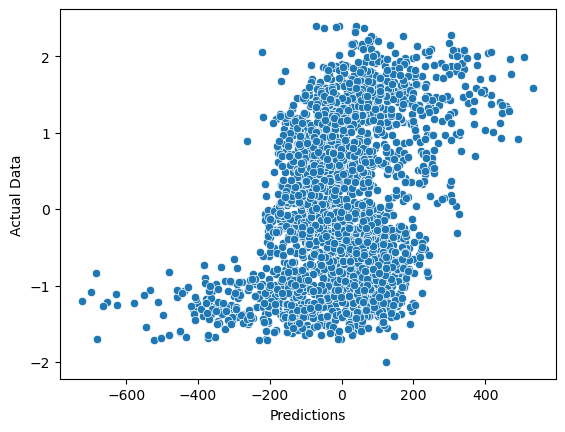

In [68]:
sns.scatterplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Data')

Kernel = Sigmoid

In [53]:
model = SVR(kernel='sigmoid')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
rmse = math.sqrt(mse(predictions, y_test))
print('Root Mean Squared Error:',rmse)

[  -2.38004698   36.80373757 -105.89396249 ...  -83.87067302   60.98989109
 -157.50071364]
Root Mean Squared Error: 140.41929169902892


C:\Users\ARYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Data')

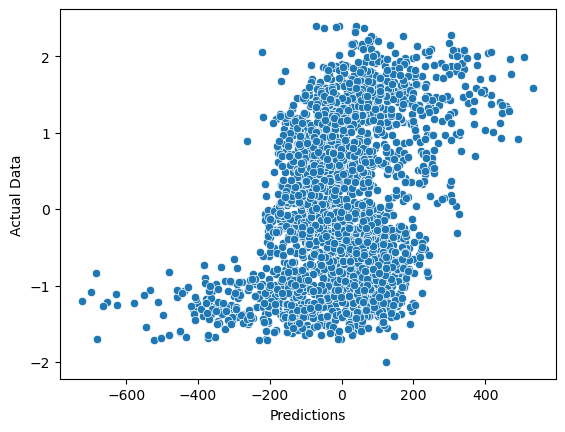

In [69]:
sns.scatterplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Data')